In [37]:
import tweepy

key = 'Secret : 관리자에게 문의하세요'
s_key = 'Secret : 관리자에게 문의하세요'
token = 'Secret : 관리자에게 문의하세요'
s_token = 'Secret : 관리자에게 문의하세요'
# 핸들러 생성, 개인정보 인증 요청
auth = tweepy.OAuthHandler(key, s_key)
# Access 요청
auth.set_access_token(token, s_token)
# twitter API 생성
api = tweepy.API(auth)
keyword = '안락사'
tweets = api.search(keyword, count = 2000) # 트윗 개수(RT는 밑 함수에서 제거)
result = []


txt = []
for i in tweets:
    txt.append(i.text)

In [38]:
# 형태소 : 의미를 가지는 최소 단위
from konlpy.tag import Twitter
twitter = Twitter()

morphs = []
morph_list = []


for i in txt:
    morphs = twitter.nouns(i)       # nouns로 명사만 fetch, 정보의 유실이 많음.
    for morph in morphs:
        morph_list.append(morph)


In [39]:
len(morph_list) # 길이

1512

In [40]:
from collections import Counter
count = Counter(morph_list)        # 개수

In [41]:
import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

mask = np.array(Image.open("cat.png"))
morph_list

['거',
 '골',
 '부분',
 '살인마',
 '드론',
 '촉',
 '개',
 '처리',
 '안락사',
 '유기견',
 '보호',
 '소',
 '검색',
 '함',
 '안락사',
 '자살',
 '약',
 '청산가리',
 '안락사',
 '자살',
 '약',
 '청산가리',
 '가격',
 '거',
 '골',
 '부분',
 '살인마',
 '드론',
 '촉',
 '개',
 '처리',
 '안락사',
 '유기견',
 '보호',
 '소',
 '검색',
 '함',
 '거',
 '골',
 '부분',
 '살인마',
 '드론',
 '촉',
 '개',
 '처리',
 '안락사',
 '유기견',
 '보호',
 '소',
 '검색',
 '함',
 '거',
 '골',
 '부분',
 '살인마',
 '드론',
 '촉',
 '개',
 '처리',
 '안락사',
 '유기견',
 '보호',
 '소',
 '검색',
 '함',
 '아이',
 '공고',
 '종료',
 '직후',
 '안락사',
 '남양주',
 '시보',
 '호소',
 '요청',
 '기간',
 '안락사',
 '코앞',
 '강아지',
 '안락사',
 '순위',
 '목격자',
 '하나',
 '대요',
 '제발',
 '강아지',
 '막대',
 '보호',
 '소',
 '알티',
 '거',
 '골',
 '부분',
 '살인마',
 '드론',
 '촉',
 '개',
 '처리',
 '안락사',
 '유기견',
 '보호',
 '소',
 '검색',
 '함',
 '거',
 '골',
 '부분',
 '살인마',
 '드론',
 '촉',
 '개',
 '처리',
 '안락사',
 '유기견',
 '보호',
 '소',
 '검색',
 '함',
 '거',
 '골',
 '부분',
 '살인마',
 '드론',
 '촉',
 '개',
 '처리',
 '안락사',
 '유기견',
 '보호',
 '소',
 '검색',
 '함',
 '거',
 '골',
 '부분',
 '살인마',
 '드론',
 '촉',
 '개',
 '처리',
 '안락사',
 '유기견',
 '보호',
 '소',
 '검색',
 '함',

In [42]:
# morph 사용할 때 실행.
import re

str_txt = ''
for i in morph_list:
    str_txt += re.sub('@.*','',i
                      .replace('RT', '').replace('\n', '')
                      .replace(':','').replace('알티', '')
                      .replace('RT', '').replace('(','')
                      .replace('https', '').replace('//','')
                      .replace(')', '')) + ' ' # RT, 개행 제거
str_txt

'거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 안락사 자살 약 청산가리 안락사 자살 약 청산가리 가격 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 아이 공고 종료 직후 안락사 남양주 시보 호소 요청 기간 안락사 코앞 강아지 안락사 순위 목격자 하나 대요 제발 강아지 막대 보호 소  거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 바람 안락사 임박 아산 얼마 전 보호 소 포화 상태 조만간 또 진행 거 애 보호 소 보호 수 개체 수 다른 개 때문 안락사 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 안락사 안 묘 생일 지라 아가 살 리트윗 아가 소식 인스타 계정 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 안락사 자살 약 청산가리 구입 방법 안락사 자살 약 청산가리 방법 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 바람 안락사 임박 아산 얼마 전 보호 소 포화 상태 조만간 또 진행 거 애 보호 소 보호 수 개체 수 다른 개 때문 안락사 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 거 골 부분 살인마 드론 촉 개 처리 안락사 유기견 보호 소 검색 함 요청 기간 안락사 코앞 강아지 안락사 순위 목격자 하나 대요 제발 강아지 막대 보호 소  아이 공고 종

In [43]:
from collections import Counter
c = Counter(str_txt).most_common()
c

[(' ', 1512),
 ('사', 142),
 ('안', 141),
 ('락', 136),
 ('보', 103),
 ('호', 100),
 ('소', 94),
 ('리', 89),
 ('살', 84),
 ('개', 75),
 ('마', 67),
 ('거', 66),
 ('인', 63),
 ('기', 63),
 ('골', 54),
 ('처', 54),
 ('드', 52),
 ('부', 51),
 ('분', 51),
 ('론', 51),
 ('촉', 51),
 ('유', 51),
 ('견', 51),
 ('검', 51),
 ('색', 51),
 ('함', 51),
 ('아', 49),
 ('가', 44),
 ('산', 41),
 ('자', 34),
 ('청', 32),
 ('약', 26),
 ('수', 26),
 ('지', 20),
 ('임', 20),
 ('간', 18),
 ('이', 16),
 ('얼', 16),
 ('상', 16),
 ('체', 15),
 ('때', 15),
 ('스', 15),
 ('포', 14),
 ('애', 14),
 ('다', 14),
 ('시', 13),
 ('박', 13),
 ('조', 13),
 ('만', 13),
 ('진', 13),
 ('른', 13),
 ('문', 13),
 ('바', 12),
 ('람', 12),
 ('전', 12),
 ('화', 12),
 ('태', 12),
 ('또', 12),
 ('행', 12),
 ('요', 11),
 ('구', 11),
 ('남', 10),
 ('강', 10),
 ('대', 10),
 ('정', 10),
 ('후', 9),
 ('위', 9),
 ('일', 9),
 ('공', 8),
 ('고', 8),
 ('직', 8),
 ('양', 8),
 ('주', 8),
 ('순', 8),
 ('제', 8),
 ('격', 7),
 ('식', 7),
 ('종', 6),
 ('료', 6),
 ('묘', 6),
 ('생', 6),
 ('라', 6),
 ('트', 6),
 ('윗', 6),
 ('타

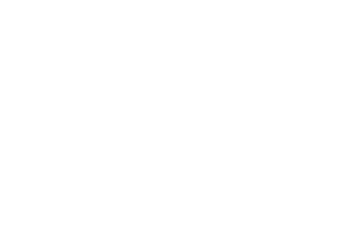

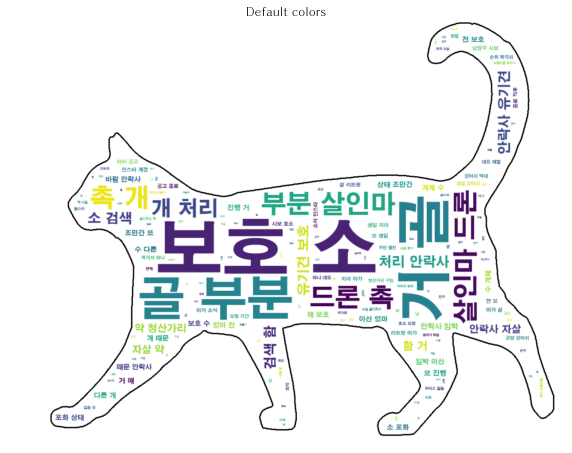

In [44]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2GTRE.TTF'
               , max_words=300, mask=mask, margin=10
               ,random_state=1, contour_color='black'
               , background_color='white'
               , contour_width=3).generate(str_txt)

wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure(figsize=(10,10))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [45]:
from konlpy.tag import Okt; t= Okt()
morphs = []
morph_list = []


for i in txt:
    morphs = t.morphs(i)       
    for morph in morphs:
        morph_list.append(morph)
for i in morph_list:
    print(t.pos(i))

[('RT', 'Alpha')]
[('@donttrytoknow_B', 'ScreenName')]
[(':', 'Punctuation')]
[('이', 'Noun')]
[('거', 'Noun')]
[('골', 'Noun')]
[('때리는', 'Verb')]
[('부분', 'Noun')]
[(':', 'Punctuation')]
[('살인마', 'Noun')]
[('들어간', 'Verb')]
[('드론', 'Noun')]
[('이', 'Noun')]
[('촉', 'Noun')]
[('이', 'Noun')]
[('좋은', 'Adjective')]
[('개', 'Noun')]
[('를', 'Noun')]
[('처리', 'Noun')]
[('하려고', 'Verb')]
[("'", 'Punctuation')]
[('안락사', 'Noun')]
[('없는', 'Adjective')]
[('유기견', 'Noun')]
[('보호', 'Noun')]
[('소', 'Noun')]
[("'", 'Punctuation')]
[('검색', 'Noun')]
[('함', 'Noun')]
[('ㅋㅋㅋㅋㅋ', 'KoreanParticle')]
[('\n', 'Foreign')]
[('ㅋ', 'KoreanParticle')]
[('\n', 'Foreign')]
[('ㅋㅋㅋㅋㅋㅋㅋ', 'KoreanParticle')]
[('\n', 'Foreign')]
[('ㅋ', 'KoreanParticle')]
[('\n', 'Foreign')]
[('ㅋ', 'KoreanParticle')]
[('\n', 'Foreign')]
[('ㅋ', 'KoreanParticle')]
[('\n', 'Foreign')]
[('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 'KoreanParticle')]
[('a', 'Alpha')]
[('chance', 'Alpha')]
[('to', 'Alpha')]
[('get', 'Alpha')]
[('in', 'Alpha')]
[('on', 'Alpha')]
[('the', 'Alpha')]
[(

In [46]:
import nltk
merged_txt = ' '.join(txt)
tokens_ko = t.nouns(merged_txt)
ko = nltk.Text(tokens_ko, name = '키워드 = 안락사')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

1512
169


FreqDist({'안락사': 134, '보호': 93, '소': 80, '거': 63, '개': 63, '처리': 52, '골': 51, '부분': 51, '살인마': 51, '드론': 51, ...})

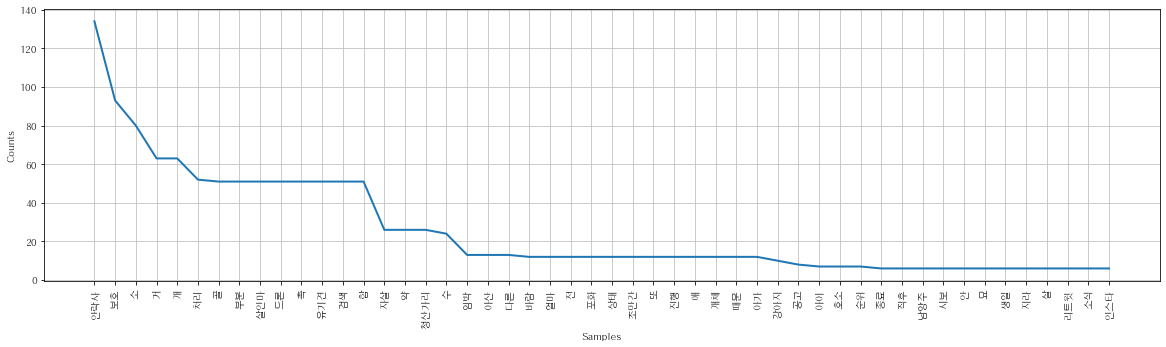

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc # 한글 깨짐 현상 해결
font_path = "C:/Windows/Fonts/H2GPRM.TTF"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
plt.figure(figsize = (20, 5))
ko.plot(50)
plt.show()

In [48]:
stop_word = ['.', '()', ')', ',', "'", '%', '-', 'X', ').', 'x', '것', '위', '중', '생', '략',
             '의', '자', '에', '안', '번', '호', '을', '이', '다', '만', '로', '가', '를', '액', '세', '제', '수']
ko = [each_word for each_word in ko if each_word not in stop_word]
print(ko)

['거', '골', '부분', '살인마', '드론', '촉', '개', '처리', '안락사', '유기견', '보호', '소', '검색', '함', '안락사', '자살', '약', '청산가리', '안락사', '자살', '약', '청산가리', '가격', '거', '골', '부분', '살인마', '드론', '촉', '개', '처리', '안락사', '유기견', '보호', '소', '검색', '함', '거', '골', '부분', '살인마', '드론', '촉', '개', '처리', '안락사', '유기견', '보호', '소', '검색', '함', '거', '골', '부분', '살인마', '드론', '촉', '개', '처리', '안락사', '유기견', '보호', '소', '검색', '함', '아이', '공고', '종료', '직후', '안락사', '남양주', '시보', '호소', '요청', '기간', '안락사', '코앞', '강아지', '안락사', '순위', '목격자', '하나', '대요', '제발', '강아지', '막대', '보호', '소', '알티', '거', '골', '부분', '살인마', '드론', '촉', '개', '처리', '안락사', '유기견', '보호', '소', '검색', '함', '거', '골', '부분', '살인마', '드론', '촉', '개', '처리', '안락사', '유기견', '보호', '소', '검색', '함', '거', '골', '부분', '살인마', '드론', '촉', '개', '처리', '안락사', '유기견', '보호', '소', '검색', '함', '거', '골', '부분', '살인마', '드론', '촉', '개', '처리', '안락사', '유기견', '보호', '소', '검색', '함', '거', '골', '부분', '살인마', '드론', '촉', '개', '처리', '안락사', '유기견', '보호', '소', '검색', '함', '바람', '안락사', '임박', '아산', '얼마', '전', '보호', '소', '포화', '상태', '조만

In [55]:
# 다시 형태소 분석
pos_tagger = Okt()
train = [('곧 안락사 위기입니다', 'pos'),
         ('급해요 급합니다', 'pos'),
         ('부탁 제발', 'pos'),
         ('살려주세요', 'pos'),
         ('도와주세요', 'pos'),
         ('ㅜㅜ ㅠㅠ', 'pos'),
         ('기부 선행 좋아', 'pos'),
         ('감사합니다', 'pos'),
         ('안락사 시키고싶다', 'neg'),
         ('죽이고싶다', 'neg'),
         ('존나 씨발', 'neg'),
         ('ㅎ ㅎㅎ ㅎㅎㅎ ㅎㅎㅎㅎ ㅎㅎㅎㅎㅎ', 'neg'),
         ('ㅋ ㅋㅋ ㅋㅋㅋ ㅋㅋㅋㅋ ㅋㅋㅋㅋㅋ', 'neg'),
         ('개새끼 미친놈', 'neg'),
         ('뒤진다 시발', 'neg'),
         ('이새기 최악', 'neg'),
         ('아오 ㅅㅂ 애미 애비', 'neg'),
         ('ㅂㅅ ㅄ', 'neg'),
         ('뒤져 죽여 죽어 ㄷㅈ ㄷㅊ ㅅㅂㄴㅇ 씹', 'neg'),
         ('마약 판매 얼음과자 ♥', 'neg')]
train_docs = [(pos_tagger.morphs(sentence[0]), sentence[1]) for sentence in train]
train_docs

[(['곧', '안락사', '위기', '입니다'], 'pos'),
 (['급해요', '급합니다'], 'pos'),
 (['부탁', '제발'], 'pos'),
 (['살려주세요'], 'pos'),
 (['도와주세요'], 'pos'),
 (['ㅜㅜ', 'ㅠㅠ'], 'pos'),
 (['기부', '선행', '좋아'], 'pos'),
 (['감사합니다'], 'pos'),
 (['안락사', '시키고싶다'], 'neg'),
 (['죽이고싶다'], 'neg'),
 (['존나', '씨발'], 'neg'),
 (['ㅎ', 'ㅎㅎ', 'ㅎㅎㅎ', 'ㅎㅎㅎㅎ', 'ㅎㅎㅎㅎㅎ'], 'neg'),
 (['ㅋ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋ'], 'neg'),
 (['개새끼', '미친', '놈'], 'neg'),
 (['뒤진다', '시발'], 'neg'),
 (['이', '새', '기', '최악'], 'neg'),
 (['아오', 'ㅅㅂ', '애', '미', '애비'], 'neg'),
 (['ㅂㅅ', 'ㅄ'], 'neg'),
 (['뒤져', '죽여', '죽어', 'ㄷㅈ', 'ㄷㅊ', 'ㅅㅂㄴㅇ', '씹'], 'neg'),
 (['마약', '판매', '얼음과자', '♥'], 'neg')]

In [56]:
# 말뭉치 만들기
all_words = set([t for d in train_docs for t in d[0]])
all_words

{'♥',
 'ㄷㅈ',
 'ㄷㅊ',
 'ㅂㅅ',
 'ㅄ',
 'ㅅㅂ',
 'ㅅㅂㄴㅇ',
 'ㅋ',
 'ㅋㅋ',
 'ㅋㅋㅋ',
 'ㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋ',
 'ㅎ',
 'ㅎㅎ',
 'ㅎㅎㅎ',
 'ㅎㅎㅎㅎ',
 'ㅎㅎㅎㅎㅎ',
 'ㅜㅜ',
 'ㅠㅠ',
 '감사합니다',
 '개새끼',
 '곧',
 '급합니다',
 '급해요',
 '기',
 '기부',
 '놈',
 '도와주세요',
 '뒤져',
 '뒤진다',
 '마약',
 '미',
 '미친',
 '부탁',
 '살려주세요',
 '새',
 '선행',
 '시발',
 '시키고싶다',
 '씨발',
 '씹',
 '아오',
 '안락사',
 '애',
 '애비',
 '얼음과자',
 '위기',
 '이',
 '입니다',
 '제발',
 '존나',
 '좋아',
 '죽어',
 '죽여',
 '죽이고싶다',
 '최악',
 '판매'}

In [57]:
def term_exists(doc):
    return {word : (word in set(doc)) for word in all_words}

train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'ㅋㅋㅋㅋㅋ': False,
   'ㅄ': False,
   'ㅠㅠ': False,
   'ㅋㅋ': False,
   '곧': True,
   '♥': False,
   '이': False,
   '애비': False,
   'ㅂㅅ': False,
   '죽여': False,
   'ㅋ': False,
   '씹': False,
   'ㅎㅎㅎ': False,
   '죽어': False,
   '좋아': False,
   '뒤진다': False,
   '새': False,
   '판매': False,
   'ㅋㅋㅋㅋ': False,
   '놈': False,
   'ㅎ': False,
   'ㅎㅎㅎㅎ': False,
   '미': False,
   'ㅜㅜ': False,
   '제발': False,
   'ㄷㅊ': False,
   '개새끼': False,
   '최악': False,
   '씨발': False,
   'ㅅㅂㄴㅇ': False,
   '아오': False,
   '존나': False,
   '죽이고싶다': False,
   '뒤져': False,
   '애': False,
   '도와주세요': False,
   '마약': False,
   '감사합니다': False,
   'ㅎㅎ': False,
   'ㅎㅎㅎㅎㅎ': False,
   'ㅋㅋㅋ': False,
   '위기': True,
   '시키고싶다': False,
   '부탁': False,
   '얼음과자': False,
   '급해요': False,
   '선행': False,
   '기': False,
   'ㄷㅈ': False,
   '입니다': True,
   '미친': False,
   '살려주세요': False,
   '시발': False,
   '안락사': True,
   'ㅅㅂ': False,
   '급합니다': False,
   '기부': False},
  'pos'),
 ({'ㅋㅋㅋㅋㅋ': False,
   'ㅄ': False,
   'ㅠㅠ': False,
   'ㅋ

In [58]:
# Naive Bayes
classifier = nltk.NaiveBayesClassifier.train(train_xy)
classifier.show_most_informative_features()

Most Informative Features
                     안락사 = True              pos : neg    =      1.4 : 1.0
                      ㅜㅜ = False             neg : pos    =      1.2 : 1.0
                      ㅠㅠ = False             neg : pos    =      1.2 : 1.0
                   감사합니다 = False             neg : pos    =      1.2 : 1.0
                       곧 = False             neg : pos    =      1.2 : 1.0
                    급합니다 = False             neg : pos    =      1.2 : 1.0
                     급해요 = False             neg : pos    =      1.2 : 1.0
                      기부 = False             neg : pos    =      1.2 : 1.0
                   도와주세요 = False             neg : pos    =      1.2 : 1.0
                      부탁 = False             neg : pos    =      1.2 : 1.0


In [59]:
test_sentence = merged_txt
test_docs = pos_tagger.morphs(test_sentence)
test_xy = term_exists(test_sentence)

In [60]:
for i in set(txt):
    judge = classifier.classify(term_exists(pos_tagger.morphs(i)))
    if judge == 'neg':
        print(i)

of verisimilitude. These worlds
안락사-자살약(청산가리)직거래
안락사-자살약(청산가리)파는곳
안락사-자살약(청산가리)판매
안락사-자살약(청산가리)팔아요
안락사-자살약(청산가리)팝니다… https://t.co/JGwjexvq4f
or vegetable stock, and often 
안락사-자살약(청산가리)파는곳
안락사-자살약(청산가리)판매
안락사-자살약(청산가리)팔아요
안락사-자살약(청산가리)팝니다
안산엑스터시
comes with… https://t.co/OIRQgDZaT0
RT @donttrytoknow_B: 이거 골때리는 부분 : 살인마 들어간 드론이 촉이 좋은 개를 처리하려고 '안락사 없는 유기견 보호소' 검색함ㅋㅋㅋㅋㅋ
ㅋ
ㅋㅋㅋㅋㅋㅋㅋ
ㅋ
ㅋ
ㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
RT @donttrytoknow_B: 이거 골때리는 부분 : 살인마 들어간 드론이 촉이 좋은 개를 처리하려고 '안락사 없는 유기견 보호소' 검색함ㅋㅋㅋㅋㅋ
ㅋ
ㅋㅋㅋㅋㅋㅋㅋ
ㅋ
ㅋ
ㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ https://t.co/VmD4Etp467
RT @yihui781: 세상에 알려지지도 못했던 베이비즈 6마리가 양주보호소에 있다는 사실을 듣자 저는 그 아이들을 모두 데리고 나오면서 임보처를 구했었습니다

그 사건 이후로 제가 임신한 햄스터 혹은 임신 가능성이 있는 암컷 햄스터가 구조 1순위…
한국에 안락사가 합법이 된다면 인구가 순식간에 반은 줄어들 것이고, 시체 처리가 골칫거리가 되며, 안락사를 위장한 살인 범죄가 늘 것이고 그렇게 국가를 구성하는 최소 인구에 못미쳐서 사라질것이다.
RT @18daysdaydream: 아마 인류사에 남을 최악의 이미지 정치요, 포퓰리즘 정치가 아닐까싶다. 2036년 퇴임할 때, 푸틴은 옐친보다도 더 최악의 지도자로 남을 것으로 예상한다. 푸틴이 옐친의 파국을 수습? 00년대 골디락스의 착시일 뿐…
RT @yihui781: 공고에 등록도 못하는 세상에 알려지지도 못하는 잊혀진 아기들은 안락사 1순위가 되거나

그 아기들을 